In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Nombramos los archivos para hacerlo sencillo
excel_1 = "Reporte1y2.xlsx"
excel_2 = "Reporte3.xlsx"

In [18]:
#Los leemos
primer_reporte = pd.read_excel(excel_1, sheet_name=0)
segundo_reporte = pd.read_excel(excel_1, sheet_name=1)
tercer_reporte = pd.read_excel(excel_2)

In [8]:
#Revisamos las primeras 5 filas que hay en el primer reporte
print(primer_reporte.head())

   Reporte      ID  ... Tiempo de produccion (Min) Productos Producidos (Units)
0        1  123654  ...                         46                          107
1        1  123498  ...                         56                           20
2        1  123999  ...                         42                           65
3        1  123654  ...                         47                           83
4        1  123498  ...                         54                           58

[5 rows x 6 columns]


In [9]:
#Revisamos las columnas
primer_reporte.columns

Index(['Reporte', 'ID', 'Nombres', 'Producto', 'Tiempo de produccion (Min)',
       'Productos Producidos (Units)'],
      dtype='object')

In [10]:
#Revisamos la columna 'Producto'
primer_reporte['Producto']

0     Pepperoni
1        Cheese
2      Mushroom
3     Pepperoni
4      Mushroom
5        Cheese
6        Cheese
7       Sausage
8     Pepperoni
9      Mushroom
10       Cheese
11      Sausage
12    Pepperoni
13     Mushroom
14       Cheese
15      Sausage
16     Mushroom
17    Pepperoni
18       Cheese
19      Sausage
20     Mushroom
21      Sausage
22    Pepperoni
23       Cheese
24     Mushroom
25    Pepperoni
26       Cheese
27      Sausage
28     Mushroom
Name: Producto, dtype: object

In [11]:
#Juntamos los reportes en uno solo
df_all = pd.concat([primer_reporte, segundo_reporte, tercer_reporte], ignore_index=True)

In [12]:
#Revisamos
print(df_all)

    Reporte      ID  ... Tiempo de produccion (Min) Productos Producidos (Units)
0         1  123654  ...                         46                          107
1         1  123498  ...                         56                           20
2         1  123999  ...                         42                           65
3         1  123654  ...                         47                           83
4         1  123498  ...                         54                           58
..      ...     ...  ...                        ...                          ...
82        3  322488  ...                         42                          134
83        3  322486  ...                         43                          132
84        3  322976  ...                         47                          143
85        3  322488  ...                         45                          136
86        3  322976  ...                         44                          132

[87 rows x 6 columns]


In [13]:
#Agrupamos el reporte general por reportes: Tabla dinámica
pivot = df_all.groupby('Reporte').mean()
pivot

,ID,Tiempo de produccion (Min),Productos Producidos (Units)
Reporte,,,
1,123716.655172,44.689655,54.482759
2,223583.241379,43.689655,80.103448
3,322593.827586,43.034483,128.448276


In [14]:
#Seleccionamos lo que nos interesa
reporte_productividad = pivot.loc[:,"Tiempo de produccion (Min)":"Productos Producidos (Units)"]
reporte_productividad

,Tiempo de produccion (Min),Productos Producidos (Units)
Reporte,,
1,44.689655,54.482759
2,43.689655,80.103448
3,43.034483,128.448276


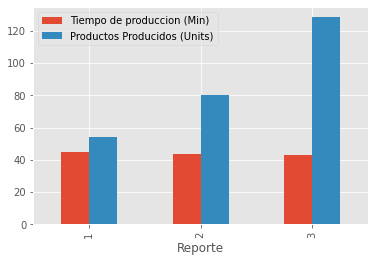

In [15]:
#Graficamos el reporte
#Utilizando estilo de ggplot (librería de R)
plt.style.use("ggplot")
reporte_productividad.plot(kind='bar')
plt.show()

In [16]:
#Exportamos el reporte unido
df_all.to_excel("reportes.xlsx")